In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
prof.df <- read.csv("../data//timing_results.csv")

In [3]:
head(prof.df)

,Ïµ,outflow,iterations,mass,time
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0e+00,0.000,100,100,0.0003733
2,1e-04,0.000,100,100,0.0004635
3,1e-03,0.000,100,100,0.0003586
4,1e-02,0.000,100,100,0.0004181
5,1e-01,0.000,100,100,0.0003904
6,0e+00,0.001,100,100,0.0005080


In [4]:
names(prof.df)[1] <- "mu"

In [5]:
head(prof.df)

,mu,outflow,iterations,mass,time
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0e+00,0.000,100,100,0.0003733
2,1e-04,0.000,100,100,0.0004635
3,1e-03,0.000,100,100,0.0003586
4,1e-02,0.000,100,100,0.0004181
5,1e-01,0.000,100,100,0.0003904
6,0e+00,0.001,100,100,0.0005080


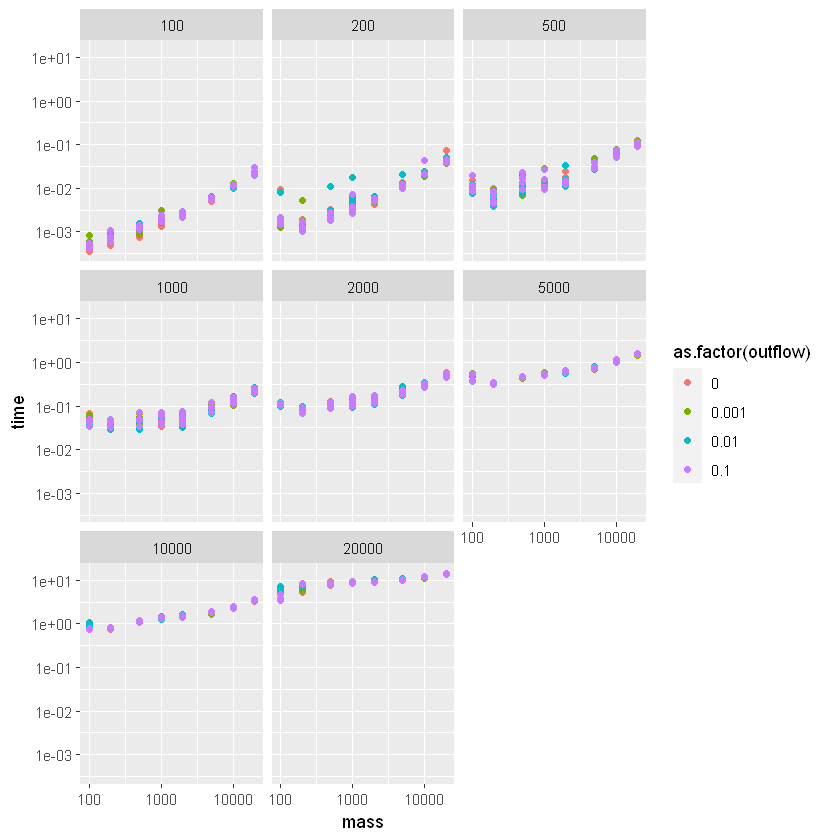

In [27]:
ggplot(prof.df, aes(x = mass, y = time, color = as.factor(outflow))) + geom_point() + facet_wrap(~iterations) + scale_y_log10() + scale_x_log10()

In [14]:
reduced.prof <- prof.df[prof.df$mu == 0.01,]

In [17]:
reduced.prof <- reduced.prof[reduced.prof$outflow == 0.1,]

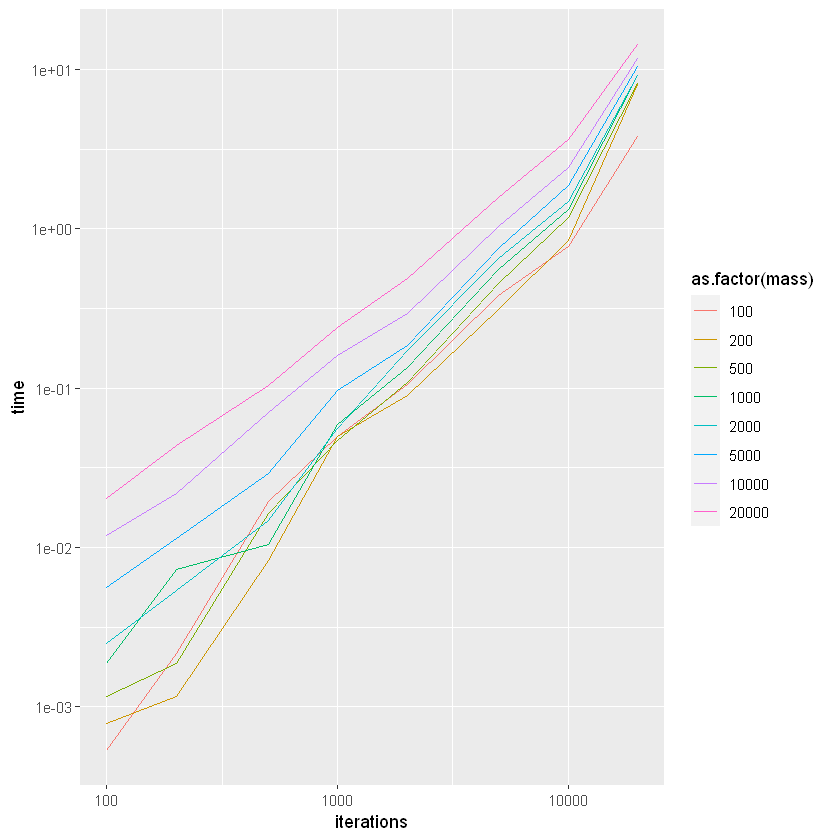

In [26]:
ggplot(reduced.prof) + geom_line(aes(x = iterations, y = time, group = mass, color = as.factor(mass))) + scale_y_log10() + scale_x_log10()

In [28]:

immutable.df <- read.csv("../data//timing_results_immutable.csv")


In [30]:
names(immutable.df)[1] = "mu"

In [31]:
r.immutable.df <- immutable.df[immutable.df$mu == 0.01,]

In [34]:
r.immutable.df$source = "immutable"

In [40]:
reduced.prof$source = "mutable"

In [41]:
all.prof <- rbind(r.immutable.df, reduced.prof)

In [42]:
combined.data <- all.prof[all.prof$mass == 2000,]

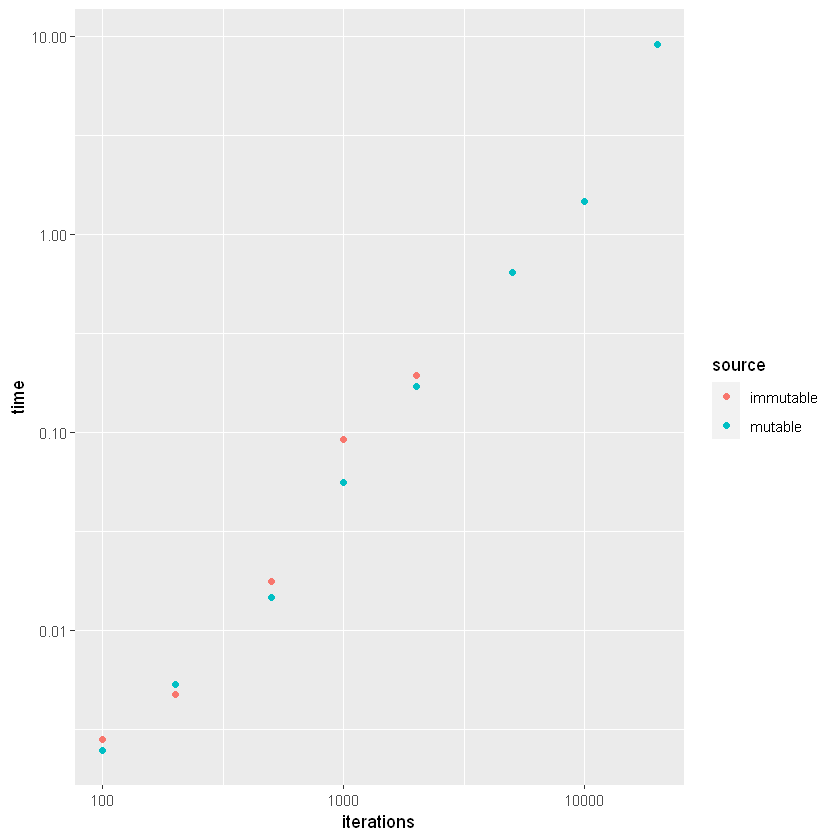

In [44]:
ggplot(combined.data) + geom_point(aes(x = iterations, y = time, color = source)) + scale_y_log10() + scale_x_log10()